# We start the project social media text preprocessing

## Text Preprocessing (Clean Data)

In [1]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

# Import the string module (though it's not used in this snippet)
import string

# Read a CSV file into a DataFrame. Replace the file path with your actual file path.
df = pd.read_csv(r'Twitter Sentiments.csv')

# Print the entire DataFrame to the console
print(df)
# Display the first few rows of the DataFrame
df.head()


      label                                              tweet
0         0   @user When a father is dysfunctional and is S...
1         0  @user @user thanks for #lyft credit i can't us...
2         0                                bihday your majesty
3         0  #model   i love u take with u all the time in ...
4         0             factsguide: society Now    #motivation
...     ...                                                ...
9993      0  finally, halo wars 2! waiting for players now,...
9994      1  are you #black &amp; feel like the  are stompi...
9995      0   @user my routine is out of whack! evening wal...
9996      0  i'm dead but still happy #poledance #madrid ##...
9997      0   â #united kingdom claimant count rate up to...

[9998 rows x 2 columns]


,label,tweet
0,0,@user When a father is dysfunctional and is S...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society Now #motivation


## convert to lowercase

In [2]:
# Create a new column 'clean_text' in the DataFrame by converting the 'tweet' column to lowercase
df['clean_text'] = df['tweet'].str.lower()

# Display the first few rows of the DataFrame to show the addition of the 'clean_text' column
df.head()


,label,tweet,clean_text
0,0,@user When a father is dysfunctional and is S...,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society Now #motivation,factsguide: society now #motivation


## Removal of Punctuations لابردنی ئیشارەکان

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
# Import the string module
import string 

# Import the timeit module (though it's not used in this snippet)
import timeit

# Define a function 'remove_punctuations' that removes punctuations from the input text
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

# Apply the 'remove_punctuations' function to the 'clean_text' column using the apply method
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punctuations(x))

# Print the first few rows of the DataFrame to show the changes made by removing punctuations
print(df.head())


   label                                              tweet  \
0      0   @user When a father is dysfunctional and is S...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society Now    #motivation   

                                          clean_text  
0   user when a father is dysfunctional and is so...  
1  user user thanks for lyft credit i cant use ca...  
2                                bihday your majesty  
3  model   i love u take with u all the time in u...  
4               factsguide society now    motivation  


## بۆ دۆزینەوەی تایمی هەر پرۆسەیەك 
time_method1 = timeit.timeit(lambda: df['clean_text'].apply(remove_punctuations), number=1000)
print(f"Execution time for Method 1: {time_method1} seconds")
Execution time for Method 1: 215.46361050003907 seconds

## Removal of Stopwords

In [4]:
# Import the stopwords module from nltk.corpus
from nltk.corpus import stopwords

# Get a string containing all English stopwords, joined by commas
stopwords_string = ", ".join(stopwords.words('english'))

# Print the string of stopwords
print(stopwords_string)

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [7]:
# Import the nltk library
import nltk

# Import the word_tokenize function from nltk.tokenize
from nltk.tokenize import word_tokenize

# Download the list of stopwords from NLTK
nltk.download('stopwords')

# Download the Punkt tokenizer for word tokenization
nltk.download('punkt')

# Define a function 'remove_stopwords' to remove stopwords from the input text
def remove_stopwords(text):
    # Get the set of English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize the input text into words
    word_tokens = word_tokenize(text)
    
    # Create a filtered text by removing stopwords
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    
    # Join the filtered words back into a string
    return ' '.join(filtered_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HawrazAbdallaShawry\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HawrazAbdallaShawry\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# Apply the 'remove_stopwords' function to the 'clean_text' column of the DataFrame
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

# Print the first few rows of the DataFrame to show the changes made by removing stopwords
print(df.head())


   label                                              tweet  \
0      0   @user When a father is dysfunctional and is S...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society Now    #motivation   

                                          clean_text  
0  user father dysfunctional selfish drags kids d...  
1  user user thanks lyft credit cant use cause do...  
2                                     bihday majesty  
3  model love u take u time urð± ðððð...  
4                      factsguide society motivation  


## Removal of Frequent Words/رەشکردنەوەی وشە دووبارەکان

In [9]:
# Import the Counter class from the collections module
from collections import Counter

# Create a Counter object to count word occurrences
word_count = Counter()

# Iterate over each text in the 'clean_text' column of the DataFrame
for text in df['clean_text']:
    # Tokenize each text into words
    for word in word_tokenize(text):
        # Update the word count in the Counter object
        word_count[word] += 1

# Retrieve the ten most common words and their counts from the Counter object
most_common_words = word_count.most_common(10)

# Print the ten most common words and their counts
print(most_common_words)


[('user', 5465), ('love', 839), ('day', 658), ('happy', 552), ('amp', 501), ('u', 405), ('im', 356), ('today', 346), ('life', 343), ('time', 339)]


In [10]:
# Define a set of the most frequent words from the Counter object
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(10))

# Define a function 'remove_freq_words' to remove frequent words from the input text
def remove_freq_words(text):
    # Tokenize the input text into words and filter out frequent words
    return " ".join([word for word in word_tokenize(text) if word not in FREQUENT_WORDS])


In [11]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_freq_words(x))
df.head()

,label,tweet,clean_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model take urð± ðððð ð¦ð¦ð¦
4,0,factsguide: society Now #motivation,factsguide society motivation


## Removal of Rare Words|لابردنی وشە دەگمەنەکان

In [12]:
# Define a set of the rarest words from the Counter object
RARE_WORDS = set(word for (word, wc) in word_count.most_common()[:-10:-1])

# Print the set of rare words
RARE_WORDS


{'accomplice',
 'breasts',
 'claimant',
 'completly',
 'deleting',
 'halo',
 'protester',
 'protocol',
 'whack'}

In [13]:
# Define a function 'remove_rare_words' to remove rare words from the input text
def remove_rare_words(text):
    # Split the input text into words and filter out rare words
    return " ".join([word for word in text.split() if word not in RARE_WORDS])


In [14]:
df['clean_text'] = df['clean_text'].apply( remove_rare_words)
df.head()

,label,tweet,clean_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model take urð± ðððð ð¦ð¦ð¦
4,0,factsguide: society Now #motivation,factsguide society motivation


## Removal of Special characters

In [15]:
# Import the 're' module for regular expressions
import re

# Define a string containing special characters
special_characters = string.punctuation

# Print the string of special characters
print(special_characters)

# Define a function 'remove_spl_chars' to remove special characters from the input text
def remove_spl_chars(text):
    # Substitute non-alphanumeric characters with a space
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    
    # Substitute multiple consecutive whitespaces with a single space
    text = re.sub('\\s+', ' ', text)
    
    return text


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
df['clean_text'] = df['clean_text'].apply(remove_spl_chars)
df.head()

,label,tweet,clean_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model take ur
4,0,factsguide: society Now #motivation,factsguide society motivation


## ڕەشکردنەوەی عەرفە زۆر دووبارەکانI gooottoooo as example ..

In [17]:
# Define a function 'remove_words_with_consecutive_chars' to remove words with consecutive characters from the input text
def remove_words_with_consecutive_chars(text, consecutive_threshold=3):
    # Define a regular expression pattern to identify words with consecutive characters
    pattern = re.compile(r'\b\w*([a-zA-Z])\1{2,}\w*\b')
    
    # Substitute words with consecutive characters with an empty string
    return re.sub(pattern, '', text)

# Apply the 'remove_words_with_consecutive_chars' function to the 'clean_text' column of the DataFrame
df['clean_text'] = df['clean_text'].apply(remove_words_with_consecutive_chars)

# Print the 'clean_text' column of the DataFrame
print(df[['clean_text']])


                                             clean_text
0     father dysfunctional selfish drags kids dysfun...
1     thanks lyft credit cant use cause dont offer w...
2                                        bihday majesty
3                                        model take ur 
4                         factsguide society motivation
...                                                 ...
9993  finally wars 2 waiting players first game hype...
9994      black feel like stomping retweet tampa miami 
9995  routine evening walk walk beach sunset clouds ...
9996  dead still poledance madrid fitness madrid sec...
9997   united kingdom count rate 22 may previous 21 ...

[9998 rows x 1 columns]


## هەر بە زۆر بەبێ گوێدان بە ڕاستی و دروستی زمانەوانی پاشگر و پێشگر لادەبات

In [18]:
# Import the PorterStemmer from nltk.stem.porter
from nltk.stem.porter import PorterStemmer

# Create an instance of the PorterStemmer
ps = PorterStemmer()

# Define a function 'stem_words' to apply stemming to the input text
def stem_words(text):
    # Tokenize the input text into words and apply stemming
    return " ".join([ps.stem(word) for word in word_tokenize(text)])


In [19]:
df['stemmed_text'] = df['clean_text'].apply(stem_words)
df.head()

,label,tweet,clean_text,stemmed_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...,father dysfunct selfish drag kid dysfunct run
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...,thank lyft credit cant use caus dont offer whe...
2,0,bihday your majesty,bihday majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,model take ur,model take ur
4,0,factsguide: society Now #motivation,factsguide society motivation,factsguid societi motiv


## Removal of URLs

In [20]:
# Define a function 'remove_urls' to remove URLs from the input text
def remove_urls(text):
    # Substitute URLs with an empty string
    return re.sub(r'http\S+', '', text)

# Apply the 'remove_urls' function to the 'stemmed_text' column of the DataFrame
df['stemmed_text'] = df['stemmed_text'].apply(lambda x: remove_urls(x))

# Display the first few rows of the DataFrame
df.head()


,label,tweet,clean_text,stemmed_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...,father dysfunct selfish drag kid dysfunct run
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...,thank lyft credit cant use caus dont offer whe...
2,0,bihday your majesty,bihday majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,model take ur,model take ur
4,0,factsguide: society Now #motivation,factsguide society motivation,factsguid societi motiv


## Spelling Correction

In [21]:
# Import the necessary libraries
import pandas as pd
from textblob import TextBlob

# Function to correct spelling in the input text
def correct_spelling(text):
    if pd.isna(text) or isinstance(text, float):
        return ""
    blob = TextBlob(str(text))
    corrected_text = ' '.join([word.correct() for word in blob.words])
    return corrected_text

# Apply the 'correct_spelling' function to the 'stemmed_text' column of the DataFrame
df['stemmed_text'] = df['stemmed_text'].apply(correct_spelling)

# Display the first few rows of the DataFrame
df.head()

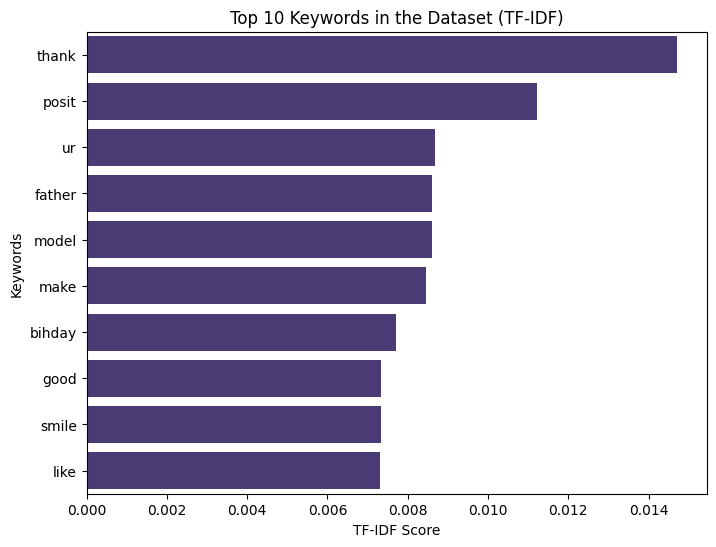

In [21]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the text data from the 'stemmed_text' column
text_data = df['stemmed_text']

# Create a TfidfVectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Transform the text data into TF-IDF features
X = vectorizer.fit_transform(text_data)

# Create a DataFrame with TF-IDF features
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Set the number of top keywords to display
top_keywords = 10

# Calculate the mean TF-IDF score for each keyword and select the top keywords
top_keywords_data = tfidf_df.mean().sort_values(ascending=False).head(top_keywords)

# Set a Seaborn color palette for the bar chart
sns.set_palette("viridis")

# Plot the top keywords in a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=top_keywords_data.values, y=top_keywords_data.index)
plt.title(f'Top {top_keywords} Keywords in the Dataset (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keywords')
plt.show()


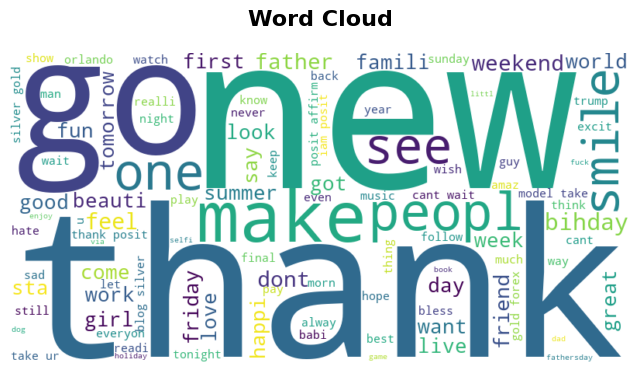

In [22]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the text data from the 'stemmed_text' column
text_data = df['stemmed_text']
all_text = ' '.join(text_data)

# Create a WordCloud object with appropriate settings
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(all_text)

# Create a plot
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Set a title with Arabic text
plt.title('Word Cloud', fontdict={'fontsize': 16, 'fontweight': 'bold'}, pad=20)
# Show the plot
plt.show()

## Feature Extraction from Text Data and Topic modeling

In [42]:
print(df.columns)

Index(['label', 'stemmed_text', 'labeel'], dtype='object')


In [23]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Extract the text data from the 'stemmed_text' column
corpus = df['stemmed_text']

# Create a CountVectorizer with specified parameters
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Transform the text data into a document-term matrix
X = vectorizer.fit_transform(corpus)

# Create an LDA model with 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the LDA model to the document-term matrix
lda.fit(X)

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the top words for each topic
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    print(f"Topic {i + 1}: {', '.join(top_words)}")


Topic 1: thank, posit, smile, bihday, beauti, affirm, need, iam, cute, bear
Topic 2: father, wait, work, friend, like, feel, dad, final, alway, dont
Topic 3: blog, peopl, orlando, trump, gold, silver, forex, hate, sad, year
Topic 4: new, healthi, good, come, day, know, feel, bihday, altwaystoh, heal
Topic 5: want, look, make, ur, model, bull, realli, summer, girl, thing


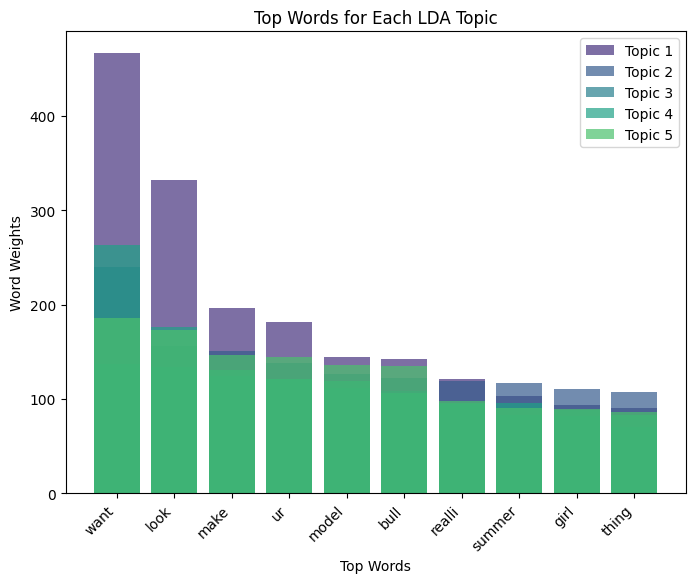

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get the top words and their weights for each topic
top_words_per_topic = []
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    top_words_weights = topic[top_words_idx]
    top_words_per_topic.append(list(zip(top_words, top_words_weights)))

# Plot the top words for each topic
plt.figure(figsize=(8, 6))
for i, topic_words in enumerate(top_words_per_topic):
    words, weights = zip(*topic_words)
    x = np.arange(len(words))
    plt.bar(x, weights, label=f'Topic {i + 1}', alpha=0.7)

plt.xlabel('Top Words')
plt.ylabel('Word Weights')
plt.title('Top Words for Each LDA Topic')
plt.xticks(x, words, rotation=45, ha='right')
plt.legend()
plt.show()

In [25]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters except spaces
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Define a new social media post
new_post = ["Feeling excited about the weekend!"]

# Preprocess the new post
preprocessed_new_post = preprocess_text(new_post[0])

# Transform the preprocessed post using a pre-trained CountVectorizer
new_post_features = vectorizer.transform([preprocessed_new_post])

# Print the number of features in the vectorizer
print(f"Number of features in the vectorizer: {len(vectorizer.get_feature_names_out())}")

# Calculate the topic distribution of the new post using a pre-trained LDA model
new_post_topic_distribution = lda.transform(new_post_features)

# Print the topic distribution of the new post
print("Topic distribution of the new post:")
print(new_post_topic_distribution)

Number of features in the vectorizer: 5371
Topic distribution of the new post:
[[0.59200933 0.10409348 0.10003195 0.10126738 0.10259785]]


In [30]:
#///////////////////////////////////////////////////////////////
# Import necessary libraries for SVM classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Read the dataset
#df = pd.read_csv(r's.csv')
df.head()

# Preprocess text data
text_column = 'stemmed_text'
label_column = 'label'
df['stemmed_text'].fillna('', inplace=True)
STOPWORDS = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(str(text))  
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in STOPWORDS]
    return ' '.join(words)

df[text_column] = df[text_column].apply(preprocess_text)

# Split the data into training and testing sets
X = df[text_column]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train an SVM classifier using GridSearchCV for hyperparameter tuning
svm_classifier = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_vectorized, y_train_encoded)

# Get the best SVM classifier from the grid search
best_svm_classifier = grid_search_svm.best_estimator_

# Make predictions on the test set
y_pred_svm = best_svm_classifier.predict(X_test_vectorized)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)

# Evaluate and print the accuracy of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_decoded)
print(f"Best SVM Model Accuracy: {accuracy_svm:.2f}")
print(f'Accuracy: {int(accuracy_svm * 100)}%')
print("Best SVM Model Classification Report:")
print(classification_report(y_test, y_pred_decoded))

Best SVM Model Accuracy: 0.95
Accuracy: 95%
Best SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1855
           1       0.89      0.41      0.56       145

    accuracy                           0.95      2000
   macro avg       0.92      0.70      0.77      2000
weighted avg       0.95      0.95      0.95      2000



In [31]:
#///////////////////////////////////////////////////////////////
# Import necessary libraries for Random Forest classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Preprocess text data
text_column = 'stemmed_text'
label_column = 'label'
df[text_column].fillna('', inplace=True)
STOPWORDS = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(str(text))  
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in STOPWORDS]
    return ' '.join(words)

df[text_column] = df[text_column].apply(preprocess_text)

# Split the data into training and testing sets
X = df[text_column]
y = df[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train a Random Forest classifier using GridSearchCV for hyperparameter tuning
rf_classifier = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_vectorized, y_train_encoded)

# Get the best Random Forest classifier from the grid search
best_rf_classifier = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_classifier.predict(X_test_vectorized)

# Decode the predicted labels
y_pred_decoded_rf = label_encoder.inverse_transform(y_pred_rf)

# Evaluate and print the accuracy of the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_decoded_rf)
print(f"Best Random Forest Model Accuracy: {accuracy_rf:.2f}")
print(f'Accuracy: {int(accuracy_rf * 100)}%')
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_decoded_rf))


Best Random Forest Model Accuracy: 0.96
Accuracy: 95%
Best Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1855
           1       0.85      0.47      0.60       145

    accuracy                           0.96      2000
   macro avg       0.90      0.73      0.79      2000
weighted avg       0.95      0.96      0.95      2000



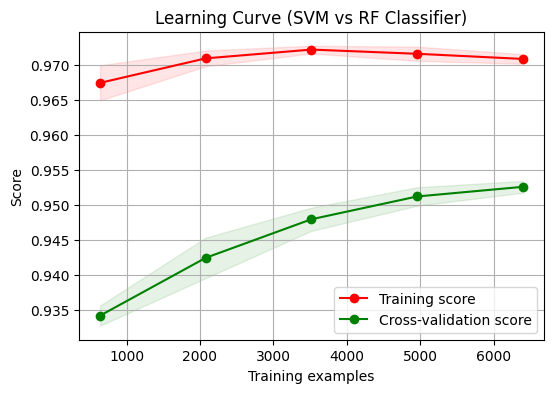

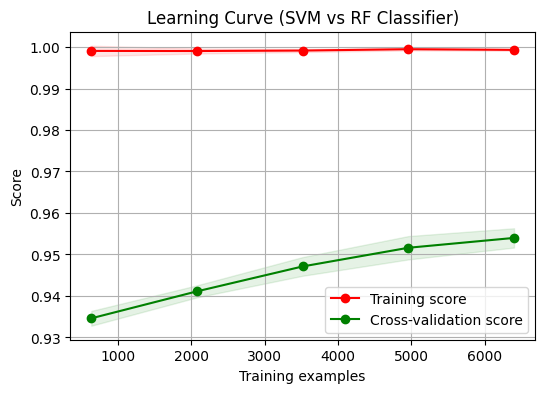

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming you have best_svm_classifier and best_rf_classifier available

title = "Learning Curve (SVM vs RF Classifier)"
plt = plot_learning_curve(best_svm_classifier, title, X_train_vectorized, y_train_encoded, cv=5, n_jobs=-1)
plt = plot_learning_curve(best_rf_classifier, title, X_train_vectorized, y_train_encoded, cv=5, n_jobs=-1)
plt.show()
